# Clustering

In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline

In [80]:
df = pd.read_csv("data/iris.csv")
df.shape

(150, 5)

In [81]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
df.head()
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## EDA

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

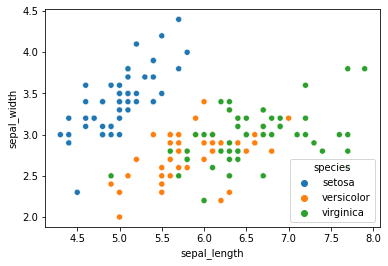

In [83]:
sns.scatterplot(x="sepal_length", y = "sepal_width", hue="species", data=df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

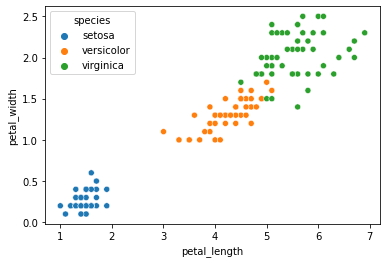

In [84]:
sns.scatterplot(x="petal_length", y = "petal_width", hue="species", data=df)

# K-Means Clustering

In [85]:
from sklearn.cluster import KMeans

In [86]:
X = df.drop('species',axis=1)[['petal_length', 'petal_width']].values
y = df['species'].values

In [87]:
km = KMeans(n_clusters=3)    
km.fit(X)

KMeans(n_clusters=3)

In [88]:
y_kmeans = kmeans.predict(X)

In [89]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
centers = km.cluster_centers_
print(centers)

[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


In [91]:
X[:,0]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

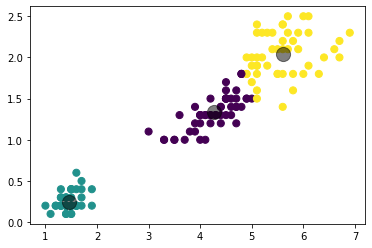

In [92]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

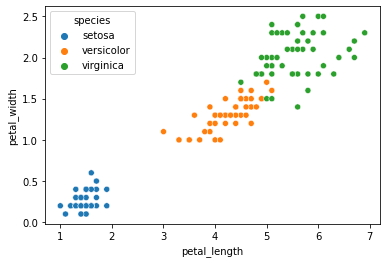

In [93]:
sns.scatterplot(x="petal_length", y = "petal_width", hue="species", data=df)

## Now for iris dataset it is clear K should be 3. But what about when it is not that obvious, how one should be the value of K?

### Introduce the Elbow method

We will use this dataset
http://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [94]:
df = pd.read_csv('data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Let's deal with numerical features first

In [95]:
numerical_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df[numerical_features].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Remember Data normalization?

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [97]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df[numerical_features])
normalized_df = pd.DataFrame(normalized_df, columns =  numerical_features )
normalized_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


### Now let's add the categorical features

In [98]:
categorical_features = ['Channel', 'Region']
for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    normalized_df = pd.concat([normalized_df, dummies], axis=1)
normalized_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0,1,0,0,1
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0,1,0,0,1
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0,1,0,0,1
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1,0,0,0,1
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0,1,0,0,1


Now just rename the normalized_df to just data

In [99]:
data = normalized_df

In [100]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0,1,0,0,1
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0,1,0,0,1
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0,1,0,0,1
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1,0,0,0,1
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0,1,0,0,1


### Now we run k-means for K from 1 to 20 and stored the sum of squared distance from the insertia_ field

In [103]:
sum_of_squared_distances = []
K = range(3,20)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sum_of_squared_distances.append(km.inertia_)

Now plot the sum of squared against K

[Text(0.5, 0, 'K'),
 Text(0, 0.5, 'sum of squared distances'),
 Text(0.5, 1.0, 'Elbow graph')]

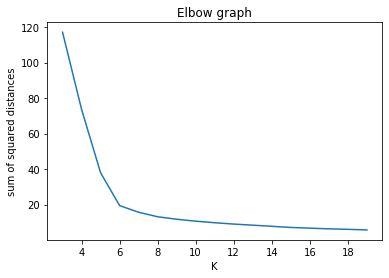

In [104]:
ax = sns.lineplot(x=K, y = sum_of_squared_distances)
ax.set(xlabel='K', ylabel='sum of squared distances', title='Elbow graph')

### So K should be 5